In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
#%matplotlib widget
%matplotlib inline

In [5]:
fin_name = input("Please input dump file for parsing: ")
dump_title = fin_name.split('.')[-1]
fin = open(fin_name, 'r')

recording_time = False
recording_atoms = False
all_rows = [] 

for line in fin:
    if line == 'ITEM: TIMESTEP\n':
        recording_time = True
        recording_atoms = False
        continue
    
    if 'ITEM: ATOMS' in line:
        headers = line.split()[2:]  
        headers.insert(0, 'Timestep') 
        recording_atoms = True
        continue
    
    if recording_time:
        timestep = int(line.strip())  
        recording_time = False
    
    if recording_atoms:
        row = [float(x) for x in line.split()]
        row.insert(0, timestep) 
        all_rows.append(row) 
        
df = pd.DataFrame(all_rows, columns=headers)

if not os.path.exists(dump_title):
    os.makedirs(dump_title)
fout_name = f'{dump_title}_combined.csv'
df.to_csv(f'./{dump_title}/{fout_name}', index=False)

print(f"Data has been written to {fout_name}")

Please input dump file for parsing:  dump.crack


Data has been written to crack_combined.csv


In [2]:
dump_crack = pd.read_csv("crack/crack_combined.csv")

In [3]:
dump_crack
#in the actual file there will be more columns but tbd what they are at the moment, probably at least 10 columns

,Timestep,id,type,xs,ys,zs
0,0,1.0,4.0,0.000100,0.000100,0.5
1,0,2.0,4.0,0.005099,0.012597,0.5
2,0,3.0,4.0,0.010098,0.000100,0.5
3,0,4.0,4.0,0.015097,0.012597,0.5
4,0,5.0,4.0,0.020096,0.000100,0.5
...,...,...,...,...,...,...
89546,5000,8037.0,5.0,0.984391,0.988896,0.5
89547,5000,8139.0,5.0,0.979353,1.000130,0.5
89548,5000,8039.0,5.0,0.994487,0.988896,0.5
89549,5000,8140.0,5.0,0.989521,1.000130,0.5


In [4]:
timesteps = dump_crack['Timestep'].unique()
types = dump_crack['type'].unique()
colors = ['red', 'orange', 'green', 'blue', 'purple']

color_mapping = {t: c for t, c in zip(types, colors)} #so I can display the different types of particles when they are plotted

x = dump_crack['xs'].to_numpy()
y = dump_crack['ys'].to_numpy()
z = dump_crack['zs'].to_numpy()

In [5]:
timesteps

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])

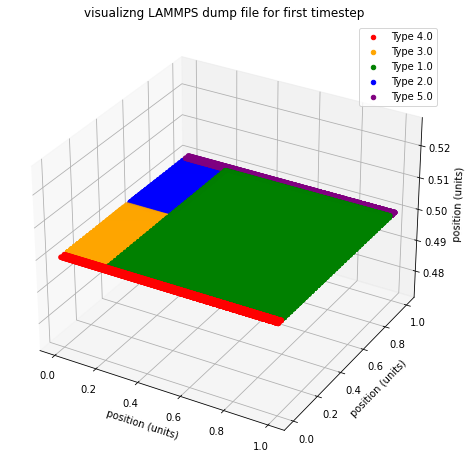

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in types:
    mask = dump_crack['type'] == i
    
    ax.scatter(x[mask], y[mask], z[mask], color=color_mapping[i], label=f'Type {i}')

ax.set_title("visualizng LAMMPS dump file for first timestep")
ax.set_xlabel("position (units)")
ax.set_ylabel("position (units)")
ax.set_zlabel("position (units)")
ax.legend(loc = 'best')

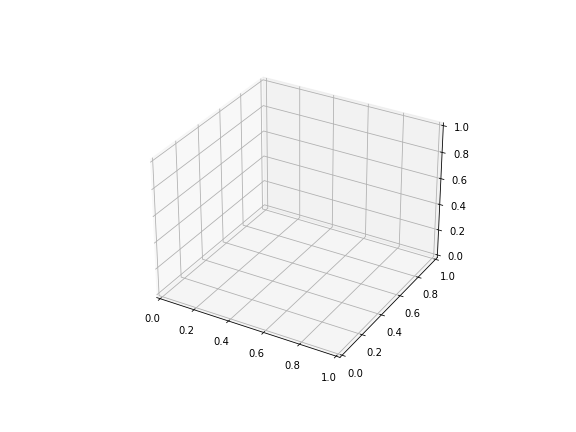

In [7]:
%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla() 

    current_data = dump_crack[dump_crack['Timestep'] == timesteps[frame]]

    for i in types:
        mask = current_data['type'] == i
        ax.scatter(current_data['xs'][mask], current_data['ys'][mask], current_data['zs'][mask],
                   color=color_mapping[i], label=f'Type {i}')

    ax.set_title(f"Visualizing LAMMPS dump file for timestep {timesteps[frame]}")
    ax.set_xlabel("Position (units)")
    ax.set_ylabel("Position (units)")
    ax.set_zlabel("Position (units)")
    ax.legend(loc='best')


ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()

In [8]:
%matplotlib inline


In [10]:
#take a cylinder from timestep a to timestep b where the radius expands radially 
#take this information to make a 3d plot for radius, timestep, and number of particles captured to see if the
#distribution is the sameish or how it varies
#direction vector along axis of the cylinder, get function to find radian distance if extending axis out to some fixed
#length
#we will define the starting point as the starting point of the ion, for this code call it the origin

#for the time steps, define the length of the cylinder as the time step you're looking at +- one time step around
#on each side, UNLESS it is the end or beginning in which we will only look at one in the future or one in the past

#for looping through with radius values, stop the loop when after increasing the radius until we cover the vacancy
#and start to redetect atoms, go 1+ that point of starting to detect atoms outside vacancy range

#for this example file, define the "gold ion" as the particle corresponding to the origin, and make sure

In [19]:
minion = dump_crack[dump_crack['type'] == 2.0]
panda = minion['xs'].min()
print(panda)
print(8338/11)
minion

9.998e-05
758.0


,Timestep,id,type,xs,ys,zs
4121,0,4022.0,2.0,0.005099,0.512498,0.5
4122,0,4222.0,2.0,0.000100,0.524995,0.5
4123,0,4224.0,2.0,0.010098,0.524995,0.5
4124,0,4024.0,2.0,0.015097,0.512498,0.5
4125,0,4026.0,2.0,0.025095,0.512498,0.5
...,...,...,...,...,...,...
89084,5000,7675.0,2.0,0.187666,0.955286,0.5
89085,5000,7676.0,2.0,0.193047,0.966638,0.5
89086,5000,7677.0,2.0,0.197693,0.955308,0.5
89087,5000,7678.0,2.0,0.202903,0.966702,0.5


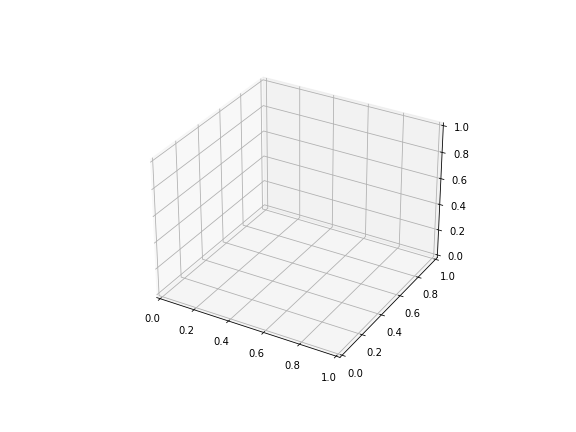

In [8]:
%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla() 

    current_data = dump_crack[dump_crack['Timestep'] == timesteps[frame]]

    for i in types:
        mask = current_data['type'] == 2.0
        ax.scatter(current_data['xs'][mask], current_data['ys'][mask], current_data['zs'][mask],
                   color=color_mapping[i], label=f'Type {i}')

    ax.set_title(f"Visualizing LAMMPS dump file for timestep {timesteps[frame]}")
    ax.set_xlabel("Position (units)")
    ax.set_ylabel("Position (units)")
    ax.set_zlabel("Position (units)")
    ax.legend(loc='best')


ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()

In [37]:
def get_cylinder_points(origin_inp, radius_inp, height_inp, num_points):
    z_values = np.linspace(origin_inp[2] - height_inp / 2, origin_inp[2] + height_inp / 2, num_points)
    thetas = np.linspace(0, 2 * np.pi, num_points)
    
    theta_grid, z_grid = np.meshgrid(thetas, z_values)

    x_grid = origin_inp[0] + radius_inp * np.cos(theta_grid)
    y_grid = origin_inp[1] + radius_inp * np.sin(theta_grid)
    
    return x_grid, y_grid, z_grid

#defining one particle as the origin particle
originx = dump_crack['xs'][44775]
originy = dump_crack['ys'][44775]
originz = dump_crack['zs'][44775]
origin = [originx, originy, originz]

origin_type = dump_crack[dump_crack['type'] == 4]
max_type4, min_type4 = origin_type['ys'].max(), origin_type['ys'].min()

origin_id = dump_crack.loc[44775, 'id']  
radius = ((max_type4 - min_type4) / (2 * 2))  
height = radius * 10  # Track length arbitrarily set to 3 particle diameters

#defining another particle that moves a lot
new_particle_df = dump_crack[dump_crack['type'] == 2.0]

new_particle_x = new_particle_df['xs'][4121]
new_particle_y = new_particle_df['ys'][4121]
new_particle_z = new_particle_df['zs'][4121]
new_particle = [new_particle_x, new_particle_y, new_particle_z]
new_particle_id = dump_crack.loc[4121, 'id']

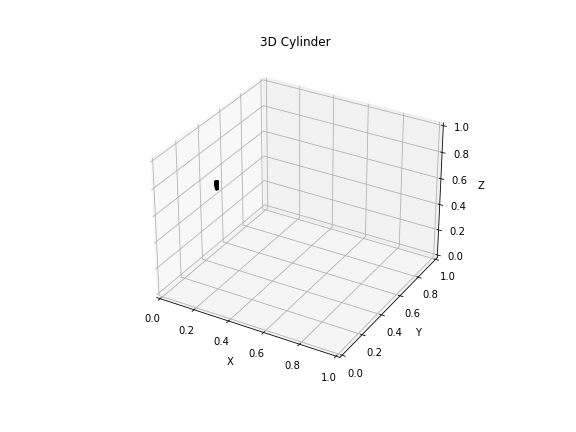

In [39]:
num_points = 100

x, y, z = get_cylinder_points(origin, radius, height, num_points)

x2, y2, z2 = get_cylinder_points(new_particle, radius, height, num_points)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x2, y2, z2, color='cyan', edgecolor='k', alpha=0.7)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Cylinder")
ax.set_xlim(0, 1) 
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.show()

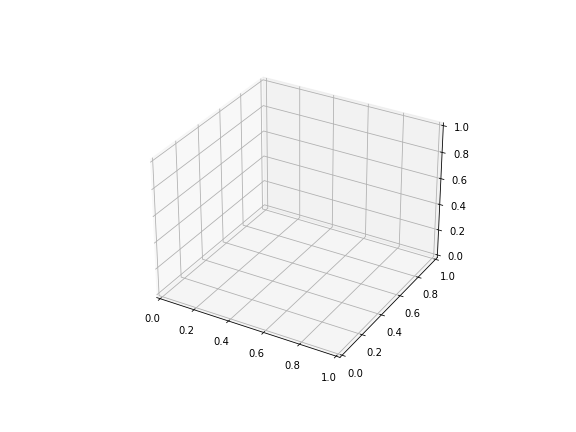

In [40]:
info_orig = []
info_new = []
for timestep in timesteps:
    timestep_data = dump_crack[dump_crack['Timestep'] == timestep]
    
    origin_particle = timestep_data[timestep_data['id'] == origin_id]
    newer_particle = timestep_data[timestep_data['id'] == new_particle_id]
    
    if not origin_particle.empty:
        originx, originy, originz = origin_particle[['xs', 'ys', 'zs']].values[0]
        origin_coord = np.array([originx, originy, originz])
        
        origin_type = timestep_data[timestep_data['type'] == 4]
        max_type4, min_type4 = origin_type['ys'].max(), origin_type['ys'].min()
    
        x_cyl, y_cyl, z_cyl = get_cylinder_points(origin_coord, radius, height, num_points=50)
        
        info_orig.append({
            'Timestep': timestep,
            'Origin_ID': origin_id,
            'xs': origin_coord[0],
            'ys': origin_coord[1],
            'zs': origin_coord[2],
            'x_cyl': x_cyl,
            'y_cyl': y_cyl,
            'z_cyl': z_cyl})
    
    if not newer_particle.empty:
        new_coord = np.array([new_particle_x, new_particle_y, new_particle_z])
        
        new_type = timestep_data[timestep_data['type'] == 2]
        
        x_cyl2, y_cyl2, z_cyl2 = get_cylinder_points(new_coord, radius, height, num_points=50)
        
        info_new.append({
            'Timestep': timestep,
            'Origin_ID': new_particle_id,
            'xs': new_coord[0],
            'ys': new_coord[1],
            'zs': new_coord[2],
            'x_cyl': x_cyl2,
            'y_cyl': y_cyl2,
            'z_cyl': z_cyl2})

info_orig_df = pd.DataFrame(info_orig)
info_new_df = pd.DataFrame(info_new)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()  # Clear the axis for new frame
    
    # Get data for the current timestep
    current_data_orig = info_orig_df[info_orig_df['Timestep'] == timesteps[frame]]
    current_data_new = info_new_df[info_new_df['Timestep'] == timesteps[frame]]
    
    # Scatter plot for particles at the current timestep
    ax.scatter(current_data_new['xs'], current_data_new['ys'], current_data_new['zs'], 
               color='mediumvioletred', label='Origin Particle')
    
    ax.plot_wireframe(current_data_new['x_cyl'].values[0], 
                      current_data_new['y_cyl'].values[0], 
                      current_data_new['z_cyl'].values[0], 
                      color='royalblue', alpha=0.5, linewidth=0.5)

    ax.set_title(f"3D Cylinder around Origin Particle - Timestep {timesteps[frame]}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(0, 0.2)
    ax.set_ylim(0.45, 0.55)
    ax.set_zlim(0.45, 0.55)

ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()

### trying to modify the code such that the z-axis is along the direction vector the particle is moving in

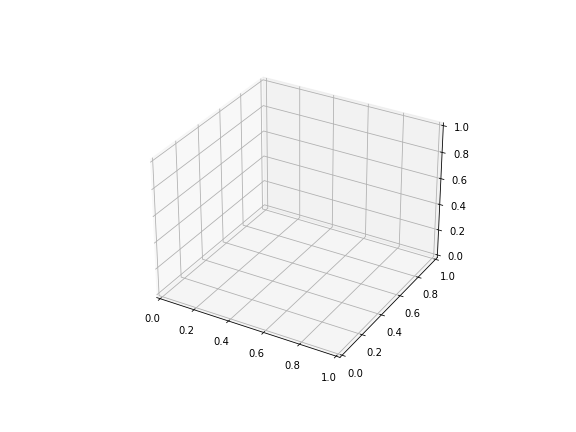

In [41]:
def get_cylinder_points_rotate(origin, direction, radius, height, num_points=50):
    # Normalize direction vector
    direction = direction / np.linalg.norm(direction)
    
    # Create theta and z values for the cylinder surface
    thetas = np.linspace(0, 2 * np.pi, num_points)
    z_values = np.linspace(-height / 2, height / 2, num_points)
    theta_grid, z_grid = np.meshgrid(thetas, z_values)

    # Compute the cylinder points in local coordinates
    x_grid = radius * np.cos(theta_grid)
    y_grid = radius * np.sin(theta_grid)
    
    points = np.vstack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel())).T

    z_axis = np.array([0, 0, 1])
    axis = np.cross(z_axis, direction)
    angle = np.arccos(np.dot(z_axis, direction))
    
    if np.linalg.norm(axis) > 1e-6:  # Avoid division by zero
        axis = axis / np.linalg.norm(axis)
        K = np.array([
            [0, -axis[2], axis[1]],
            [axis[2], 0, -axis[0]],
            [-axis[1], axis[0], 0]
        ])
        rotation_matrix = (
            np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * np.dot(K, K)
        )
        rotated_points = points @ rotation_matrix.T
    else:
        rotated_points = points  # No rotation needed if angle is zero

    # Translate to the cylinder's origin
    rotated_points[:, 0] += origin[0]
    rotated_points[:, 1] += origin[1]
    rotated_points[:, 2] += origin[2]
    
    # Reshape to grids for plotting
    x_cyl, y_cyl, z_cyl = (
        rotated_points[:, 0].reshape(num_points, num_points),
        rotated_points[:, 1].reshape(num_points, num_points),
        rotated_points[:, 2].reshape(num_points, num_points),
    )
    return x_cyl, y_cyl, z_cyl


# Initialize origin particle data
info_orig = []
info_new = []

prev_origin_coord = None  # For tracking the previous coordinate

for timestep in timesteps:
    timestep_data = dump_crack[dump_crack['Timestep'] == timestep]
    origin_particle = timestep_data[timestep_data['id'] == origin_id]
    
    if not origin_particle.empty:
        originx, originy, originz = origin_particle[['xs', 'ys', 'zs']].values[0]
        origin_coord = np.array([originx, originy, originz])
        
        # Calculate the direction vector between the previous and current position
        if prev_origin_coord is not None:
            direction = origin_coord - prev_origin_coord
        else:
            direction = np.array([0, 0, 1])  # Default direction for the first timestep
        
        x_cyl, y_cyl, z_cyl = get_cylinder_points_rotate(origin_coord, direction, radius, height, num_points=50)
        
        info_orig.append({
            'Timestep': timestep,
            'Origin_ID': origin_id,
            'xs': origin_coord[0],
            'ys': origin_coord[1],
            'zs': origin_coord[2],
            'x_cyl': x_cyl,
            'y_cyl': y_cyl,
            'z_cyl': z_cyl
        })
        
        prev_origin_coord = origin_coord  # Update for next timestep


info_orig_df = pd.DataFrame(info_orig)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()  # Clear the axis for new frame
    current_data_orig = info_orig_df[info_orig_df['Timestep'] == timesteps[frame]]
    
    # Scatter plot for particle
    ax.scatter(current_data_orig['xs'], current_data_orig['ys'], current_data_orig['zs'], 
               color='mediumvioletred', label='Origin Particle')
    
    # Plot cylinder
    ax.plot_wireframe(current_data_orig['x_cyl'].values[0], 
                      current_data_orig['y_cyl'].values[0], 
                      current_data_orig['z_cyl'].values[0], 
                      color='royalblue', alpha=0.5, linewidth=0.5)
    
    ax.set_title(f"3D Cylinder around Origin Particle - Timestep {timesteps[frame]}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(0, 0.2)
    ax.set_ylim(0.45, 0.55)
    ax.set_zlim(0.45, 0.55)

ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()

## realizing I screwed up completely above so redoing the code so the point I'm grabbing is actually updating over each timestep

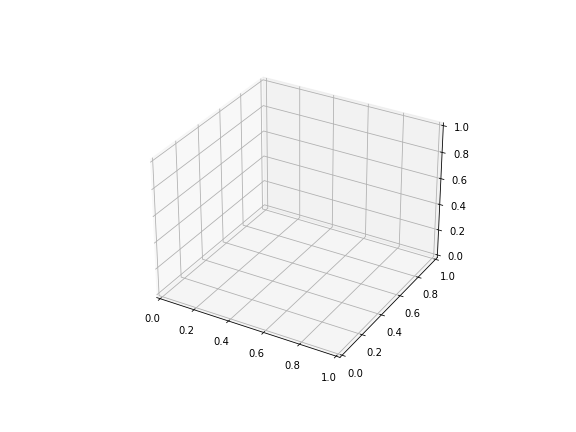

In [86]:
timesteps = dump_crack['Timestep'].unique()
timesteps.sort() 

first_timestep_data = dump_crack[dump_crack['Timestep'] == timesteps[0]]
target_particle_index = 4022 #put in the 'id' of the particle you wish to track on the timestep 0

if target_particle_index >= len(first_timestep_data):
    raise IndexError("The target_particle_index is out of bounds for the number of particles in a timestep.")


%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()  
    
    current_data = dump_crack[dump_crack['Timestep'] == timesteps[frame]]
    
    for i in types:
        mask = current_data['type'] == i
        ax.scatter(current_data['xs'][mask], current_data['ys'][mask], current_data['zs'][mask],
                   color=color_mapping[i], label=f'Type {i}')
    
    # Get the position of the target particle at the current timestep
    target_particle_data = current_data[current_data['id'] == target_particle_index]
    
    if not target_particle_data.empty:
        origin_pos = target_particle_data[['xs', 'ys', 'zs']].values[0]
    else:
        origin_pos = [np.nan, np.nan, np.nan]  # Handle case where the particle is not found in this timestep
    
    if not np.isnan(origin_pos).any():  # Only plot if position is valid
        ax.scatter(*origin_pos, color='red', s=100, label='Tracked Particle')

    ax.set_title(f"Visualizing LAMMPS dump file for timestep {timesteps[frame]}")
    ax.set_xlabel("Position (units)")
    ax.set_ylabel("Position (units)")
    ax.set_zlabel("Position (units)")
    ax.legend(loc='best')

ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()

In [87]:
def get_cylinder_points(origin_inp, radius_inp, height_inp, num_points):
    z_values = np.linspace(origin_inp[2] - height_inp / 2, origin_inp[2] + height_inp / 2, num_points)
    thetas = np.linspace(0, 2 * np.pi, num_points)
    
    theta_grid, z_grid = np.meshgrid(thetas, z_values)

    x_grid = origin_inp[0] + radius_inp * np.cos(theta_grid)
    y_grid = origin_inp[1] + radius_inp * np.sin(theta_grid)
    
    return x_grid, y_grid, z_grid

#defining one particle as the origin particle
originx = dump_crack['xs'][44775]
originy = dump_crack['ys'][44775]
originz = dump_crack['zs'][44775]
origin = [originx, originy, originz]

origin_type = dump_crack[dump_crack['type'] == 4]
max_type4, min_type4 = origin_type['ys'].max(), origin_type['ys'].min()

origin_id = dump_crack.loc[44775, 'id']  
radius = ((max_type4 - min_type4) / (2 * 2))  
height = radius * 10  # Track length arbitrarily set to 3 particle diameters

#defining another particle that moves a lot
new_particle_df = dump_crack[dump_crack['type'] == 2.0]

new_particle_x = new_particle_df['xs'][4121]
new_particle_y = new_particle_df['ys'][4121]
new_particle_z = new_particle_df['zs'][4121]
new_particle = [new_particle_x, new_particle_y, new_particle_z]
new_particle_id = dump_crack.loc[4121, 'id']

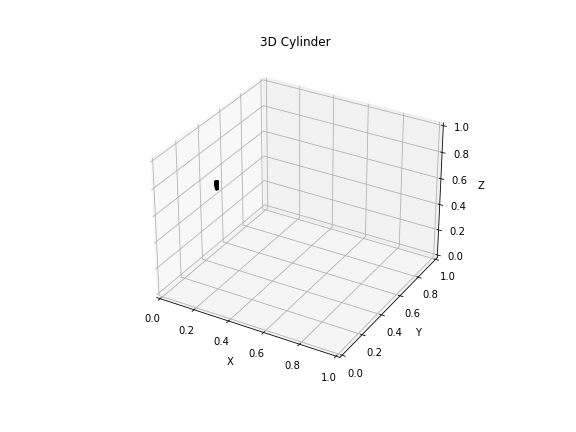

In [88]:
num_points = 100

x, y, z = get_cylinder_points(origin, radius, height, num_points)

x2, y2, z2 = get_cylinder_points(new_particle, radius, height, num_points)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x2, y2, z2, color='cyan', edgecolor='k', alpha=0.7)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Cylinder")
ax.set_xlim(0, 1) 
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.show()

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7f785a1ca6a0>>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1479, in _step
    self._init_draw()
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1753, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/var/folders/8_/7cxg7b591zn267gy4zwgyw6h0000gn/T/ipykernel_65105/191304625.py", line 101, in update
    

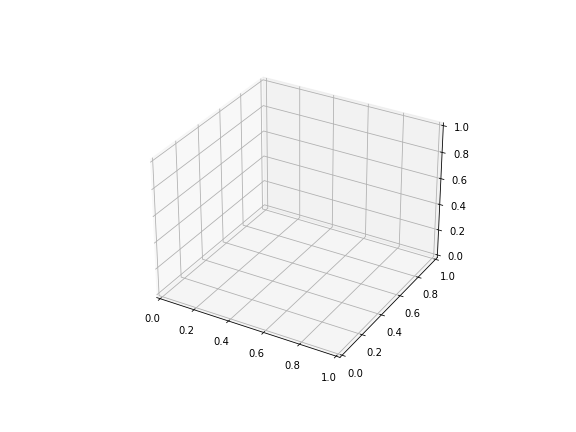

In [89]:
# Assuming you have this function to generate cylinder points
def get_cylinder_points(center, radius, height, num_points=50):
    """
    Generate points around a cylinder centered at `center` with a given `radius` and `height`.
    """
    theta = np.linspace(0, 2 * np.pi, num_points)
    z = np.linspace(-height/2, height/2, num_points)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius * np.cos(theta_grid) + center[0]
    y_grid = radius * np.sin(theta_grid) + center[1]
    z_grid = z_grid + center[2]
    
    return x_grid, y_grid, z_grid

# Assuming `timesteps` is a sorted list of unique timesteps from your data
timesteps = dump_crack['Timestep'].unique()
timesteps.sort() 

first_timestep_data = dump_crack[dump_crack['Timestep'] == timesteps[0]]
target_particle_index = 4022  # Put in the 'id' of the particle you wish to track

if target_particle_index >= len(first_timestep_data):
    raise IndexError("The target_particle_index is out of bounds for the number of particles in a timestep.")

# Set up the plot for animation
%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()  # Clear the axis for new frame
    
    # Get the data for the current timestep
    current_data = dump_crack[dump_crack['Timestep'] == timesteps[frame]]
    
    
    # Get the position of the target particle at the current timestep
    target_particle_data = current_data[current_data['id'] == target_particle_index]
    
    if not target_particle_data.empty:
        origin_pos = target_particle_data[['xs', 'ys', 'zs']].values[0]
    else:
        origin_pos = [np.nan, np.nan, np.nan]  # Handle case where the particle is not found in this timestep
    
    # If the position is valid, plot the tracked particle
    if not np.isnan(origin_pos).any():  
        ax.scatter(*origin_pos, color='red', s=100, label='Tracked Particle')

        # Generate the cylinder points around the tracked particle
        radius = 0.05  # Adjust as needed
        height = 0.1  # Adjust as needed
        x_cyl, y_cyl, z_cyl = get_cylinder_points(origin_pos, radius, height, num_points=50)

        # Plot the cylinder around the tracked particle
        ax.plot_wireframe(x_cyl, y_cyl, z_cyl, color='royalblue', alpha=0.5, linewidth=0.5)
    
    ax.set_title(f"Visualizing LAMMPS dump file for timestep {timesteps[frame]}")
    ax.set_xlabel("Position (units)")
    ax.set_ylabel("Position (units)")
    ax.set_zlabel("Position (units)")
    ax.legend(loc='best')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()


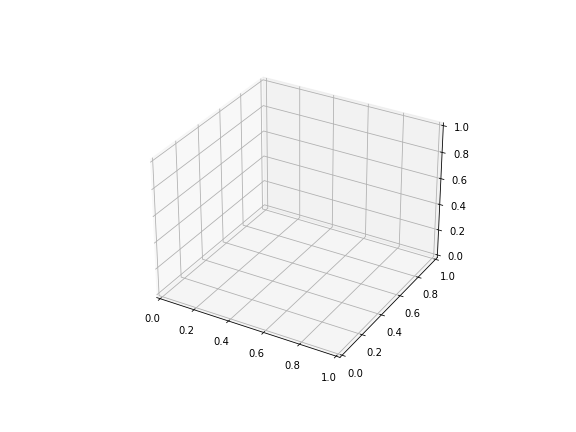

In [90]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Function to calculate cylinder points (same as before)
def get_cylinder_points(center, radius, height, num_points=50):
    # Generate points for a cylinder around the particle
    theta = np.linspace(0, 2 * np.pi, num_points)
    z = np.linspace(-height / 2, height / 2, num_points)
    theta_grid, z_grid = np.meshgrid(theta, z)
    
    x_cyl = center[0] + radius * np.cos(theta_grid)
    y_cyl = center[1] + radius * np.sin(theta_grid)
    z_cyl = center[2] + z_grid
    
    return x_cyl, y_cyl, z_cyl

# Function to calculate the direction vector and rotate cylinder
def update_cylinder_for_direction(previous_pos, current_pos, center, radius, height, num_points=50):
    # Calculate the direction vector (velocity) of the particle
    direction_vector = current_pos - previous_pos
    
    # Normalize the direction vector
    norm_direction = direction_vector / np.linalg.norm(direction_vector)
    
    # Cylinder is always centered on the particle, so no need to shift its center
    # Calculate the axis of rotation (the vector perpendicular to the direction vector and z-axis)
    z_axis = np.array([0, 0, 1])
    axis_of_rotation = np.cross(z_axis, norm_direction)
    
    # If the cross product is very small, it means the vector is already aligned with the z-axis, no need for rotation
    if np.linalg.norm(axis_of_rotation) < 1e-6:
        axis_of_rotation = np.array([1, 0, 0])  # Arbitrary axis for no rotation
    
    # Compute the angle between the direction vector and the z-axis
    angle = np.arccos(np.dot(z_axis, norm_direction))
    
    # Create the rotation matrix using the axis of rotation and the angle
    rotation = R.from_rotvec(axis_of_rotation * angle)
    
    # Get the cylinder points and apply the rotation
    x_cyl, y_cyl, z_cyl = get_cylinder_points(center, radius, height, num_points)
    
    # Flatten the cylinder points for rotation
    points = np.vstack((x_cyl.flatten(), y_cyl.flatten(), z_cyl.flatten())).T
    
    # Apply the rotation to each point
    rotated_points = rotation.apply(points)
    
    # Reshape back to the cylinder grid
    x_cyl_rotated = rotated_points[:, 0].reshape(x_cyl.shape)
    y_cyl_rotated = rotated_points[:, 1].reshape(y_cyl.shape)
    z_cyl_rotated = rotated_points[:, 2].reshape(z_cyl.shape)
    
    # Fix the radius of the cylinder (ensure it remains constant)
    # Calculate the radius at the start of the frame, before rotation
    initial_radius = np.linalg.norm([x_cyl[0, 0] - center[0], y_cyl[0, 0] - center[1]])

    # Scale the rotated x and y coordinates to ensure the radius stays constant
    scale_factor = initial_radius / np.linalg.norm([x_cyl_rotated[0, 0] - center[0], y_cyl_rotated[0, 0] - center[1]])

    # Apply the scaling to x and y coordinates to maintain the fixed radius
    x_cyl_rotated = (x_cyl_rotated - center[0]) * scale_factor + center[0]
    y_cyl_rotated = (y_cyl_rotated - center[1]) * scale_factor + center[1]
    
    # Return the rotated and scaled cylinder
    return x_cyl_rotated, y_cyl_rotated, z_cyl_rotated



# Main code to update the cylinder position at each timestep
%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()  # Clear the axis for new frame
    
    # Get the data for the current timestep
    current_data = dump_crack[dump_crack['Timestep'] == timesteps[frame]]
    
    for i in types:
        mask = current_data['type'] == i
        ax.scatter(current_data['xs'][mask], current_data['ys'][mask], current_data['zs'][mask],
                   color=color_mapping[i], label=f'Type {i}')
    target_particle_data = current_data[current_data['id'] == target_particle_index]
    
    if not target_particle_data.empty:
        origin_pos = target_particle_data[['xs', 'ys', 'zs']].values[0]
    else:
        origin_pos = [np.nan, np.nan, np.nan]  # Handle case where the particle is not found in this timestep
    
    # If this is not the first timestep, calculate the direction vector and rotate the cylinder
    if frame > 0:
        previous_data = dump_crack[dump_crack['Timestep'] == timesteps[frame - 1]]
        previous_pos = previous_data[previous_data['id'] == target_particle_index][['xs', 'ys', 'zs']].values[0]
        x_cyl_rotated, y_cyl_rotated, z_cyl_rotated = update_cylinder_for_direction(previous_pos, origin_pos, origin_pos, radius=0.05, height=0.1)
    else:
        # First frame: no movement, so just use the original cylinder
        x_cyl_rotated, y_cyl_rotated, z_cyl_rotated = get_cylinder_points(origin_pos, radius=0.05, height=0.1)
    
    # Plot the tracked particle position
    if not np.isnan(origin_pos).any():
        ax.scatter(*origin_pos, color='red', s=100, label='Tracked Particle')

        # Plot the rotated cylinder, ensuring it stays centered on the particle
        ax.plot_wireframe(x_cyl_rotated, y_cyl_rotated, z_cyl_rotated, color='royalblue', alpha=0.5, linewidth=0.5)
    
    ax.set_title(f"Visualizing LAMMPS dump file for timestep {timesteps[frame]}")
    ax.set_xlabel("Position (units)")
    ax.set_ylabel("Position (units)")
    ax.set_zlabel("Position (units)")
    ax.legend(loc='best')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()


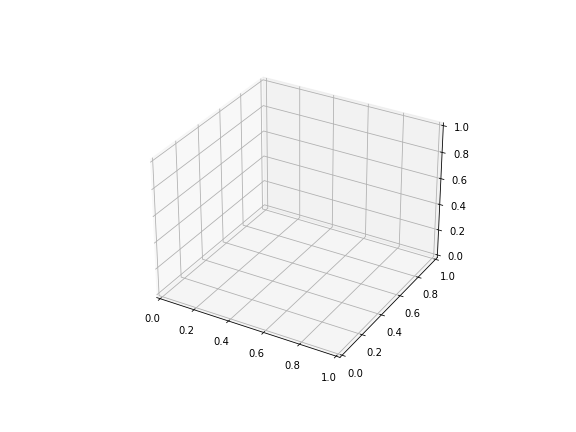

In [9]:
# Function to calculate the direction vector and rotate the cylinder
def update_cylinder_for_direction(previous_pos, current_pos, radius, height, num_points=50):
    # Calculate the direction vector (velocity) of the particle
    direction_vector = current_pos - previous_pos
    
    # Normalize the direction vector
    norm_direction = direction_vector / np.linalg.norm(direction_vector)
    
    # Cylinder is always centered on the tracked particle, so we do not shift its center
    # Calculate the axis of rotation (the vector perpendicular to the direction vector and z-axis)
    z_axis = np.array([0, 0, 1])
    axis_of_rotation = np.cross(z_axis, norm_direction)
    
    # If the cross product is very small, it means the vector is already aligned with the z-axis, no need for rotation
    if np.linalg.norm(axis_of_rotation) < 1e-6:
        axis_of_rotation = np.array([1, 0, 0])  # Arbitrary axis for no rotation
    
    # Compute the angle between the direction vector and the z-axis
    angle = np.arccos(np.dot(z_axis, norm_direction))
    
    # Create the rotation matrix using the axis of rotation and the angle
    rotation = R.from_rotvec(axis_of_rotation * angle)
    
    # Get the cylinder points and apply the rotation
    # These are the points relative to the particle, not the absolute positions
    x_cyl, y_cyl, z_cyl = get_cylinder_points(np.array([0, 0, 0]), radius, height, num_points)
    
    # Flatten the cylinder points for rotation
    points = np.vstack((x_cyl.flatten(), y_cyl.flatten(), z_cyl.flatten())).T
    
    # Apply the rotation to each point
    rotated_points = rotation.apply(points)
    
    # Reshape back to the cylinder grid
    x_cyl_rotated = rotated_points[:, 0].reshape(x_cyl.shape)
    y_cyl_rotated = rotated_points[:, 1].reshape(y_cyl.shape)
    z_cyl_rotated = rotated_points[:, 2].reshape(z_cyl.shape)
    
    # Return the rotated cylinder with the tracked particle at the origin
    return x_cyl_rotated, y_cyl_rotated, z_cyl_rotated

# Main code to update the cylinder position at each timestep
%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()  # Clear the axis for new frame
    
    # Get the data for the current timestep
    current_data = dump_crack[dump_crack['Timestep'] == timesteps[frame]]
    
    for i in types:
        mask = current_data['type'] == i
        ax.scatter(current_data['xs'][mask], current_data['ys'][mask], current_data['zs'][mask],
                   color=color_mapping[i], label=f'Type {i}')
    
    target_particle_data = current_data[current_data['id'] == target_particle_index]
    
    if not target_particle_data.empty:
        origin_pos = target_particle_data[['xs', 'ys', 'zs']].values[0]
    else:
        origin_pos = [np.nan, np.nan, np.nan]  # Handle case where the particle is not found in this timestep
    
    # If this is not the first timestep, calculate the direction vector and rotate the cylinder
    if frame > 0:
        previous_data = dump_crack[dump_crack['Timestep'] == timesteps[frame - 1]]
        previous_pos = previous_data[previous_data['id'] == target_particle_index][['xs', 'ys', 'zs']].values[0]
        x_cyl_rotated, y_cyl_rotated, z_cyl_rotated = update_cylinder_for_direction(previous_pos, origin_pos, radius=0.05, height=0.1)
    else:
        # First frame: no movement, so just use the original cylinder
        x_cyl_rotated, y_cyl_rotated, z_cyl_rotated = get_cylinder_points([0, 0, 0], radius=0.05, height=0.1)
    
    # Plot the tracked particle position
    if not np.isnan(origin_pos).any():
        ax.scatter(*origin_pos, color='red', s=100, label='Tracked Particle')

        # Plot the rotated cylinder, ensuring it stays centered on the tracked particle
        ax.plot_wireframe(x_cyl_rotated + origin_pos[0], 
                          y_cyl_rotated + origin_pos[1], 
                          z_cyl_rotated + origin_pos[2], 
                          color='royalblue', alpha=0.5, linewidth=0.5)
    
    ax.set_title(f"Visualizing LAMMPS dump file for timestep {timesteps[frame]}")
    ax.set_xlabel("Position (units)")
    ax.set_ylabel("Position (units)")
    ax.set_zlabel("Position (units)")
    ax.legend(loc='best')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(timesteps), interval=500, repeat=False)
plt.show()


#fix this code and this error later - at least we fixed how the particle is being updated for each time step and the cylinder is now rotating and remains centered on the tracked particle